<a href="https://colab.research.google.com/github/safina57/Bank-Churn/blob/main/Account_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1- Introduction to Bank Churn

Bank churn, also known as customer attrition, refers to the phenomenon where customers close their bank accounts or cease to use the bank's services.

Understanding and predicting bank churn is crucial for financial institutions, as retaining existing customers is often more cost-effective than acquiring new ones.

By analyzing customer data and identifying patterns associated with churn, banks can develop strategies to improve customer satisfaction and loyalty.
**bold text**
This project focuses on using machine learning techniques to predict the likelihood of a customer closing their bank account, enabling proactive measures to mitigate churn and enhance customer retention.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ppscore keras-tuner

#2- Importing Libraries

In [ ]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import ppscore as pps
import seaborn as sns
import keras_tuner as kt
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense , Dropout, BatchNormalization, Input


warnings.filterwarnings('ignore')

#3- Data Exploration

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/ML_data/Customer_Account/train.csv')

In [ ]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
print(f'data shape: {data.shape}')

data shape: (165034, 14)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

## Data Exploration

In this section, we explored the dataset and examined the features available for analysis.

The dataset includes the following features:

- **CreditScore**: A numeric value representing the customer's credit score.
- **Age**: The age of the customer.
- **Balance**: The balance in the customer's bank account.
- **EstimatedSalary**: The estimated salary of the customer.
- **Tenure**: The number of years the customer has been with the bank.
- **NumOfProducts**: The number of products the customer has with the bank.
- **HasCrCard**: A binary feature indicating whether the customer has a credit card.
- **IsActiveMember**: A binary feature indicating whether the customer is an active member.
- **Geography**: The geographic location of the customer.
- **Gender**: The gender of the customer.

Upon examining the dataset, we found that there are no null or duplicate values. This ensures that the data is clean and ready for further analysis and model building.


#4-Data Visualization

In [ ]:
# Set the style of the plot to a dark background
sns.set_style("whitegrid")

# Customize the seaborn style with specific colors and context settings
sns.set(rc={
    "axes.facecolor": "#f2e5ff",  # Set the face color of the axes to a light violet
    "figure.facecolor": "#f2e5ff",  # Set the face color of the entire figure to a light violet
    "grid.color": "#e0c3ff"  # Set the color of the grid lines to a soft violet
})

# Set the context to "poster" size with a specific font scale
sns.set_context("poster", font_scale=0.7)

# Define custom color palettes for seaborn plots
palette = ["#8a2be2", "#9370db", "#ba55d3", "#dda0dd", "#ee82ee"]
palette_cmap = ["#9370db", "#ba55d3", "#8a2be2", "#dda0dd", "#ee82ee"]

# Display the color palettes using seaborn
# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()


In [ ]:
def Categorical_Features_Visulatisation(data,feature):
  fig = plt.figure(figsize=(10, 5))

  # Create a count plot with the new palette
  p = sns.countplot(y=feature, data=data, palette=palette[1:3], edgecolor='#4b0082', linewidth=2, width=0.7)

  # Add text on top of the bars
  for container in p.containers:
      p.bar_label(container, label_type="center", color='#4b0082', fontsize=17, weight='bold', padding=6,
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#f2e5ff", "edgecolor": '#4b0082', "linewidth": 2, "alpha": 1})

  # Set the title and labels with appropriate colors and styles
  plt.title(f"Distribution of {feature} in Data", color="#4b0082", fontsize=20, weight='bold')
  plt.xlabel("Count", color="#4b0082", fontsize=16)
  plt.ylabel(feature, color="#4b0082", fontsize=16)

  # Show the plot
  plt.show()

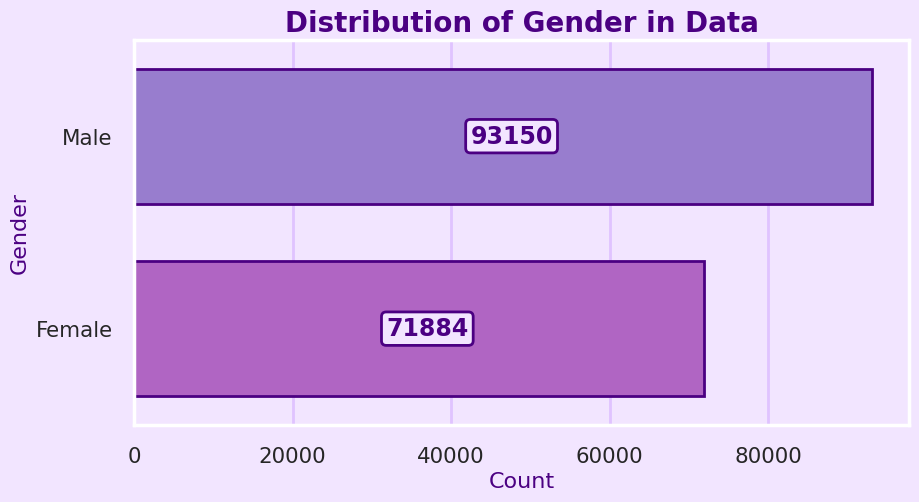

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="Gender")

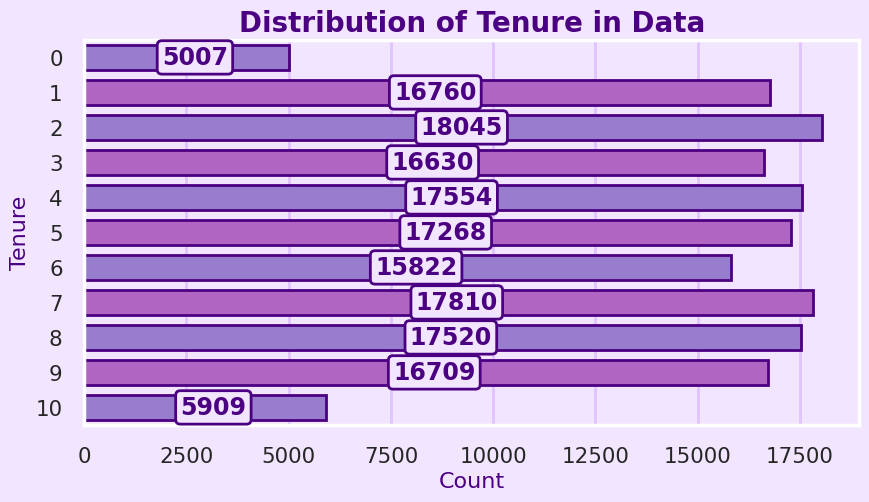

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="Tenure")

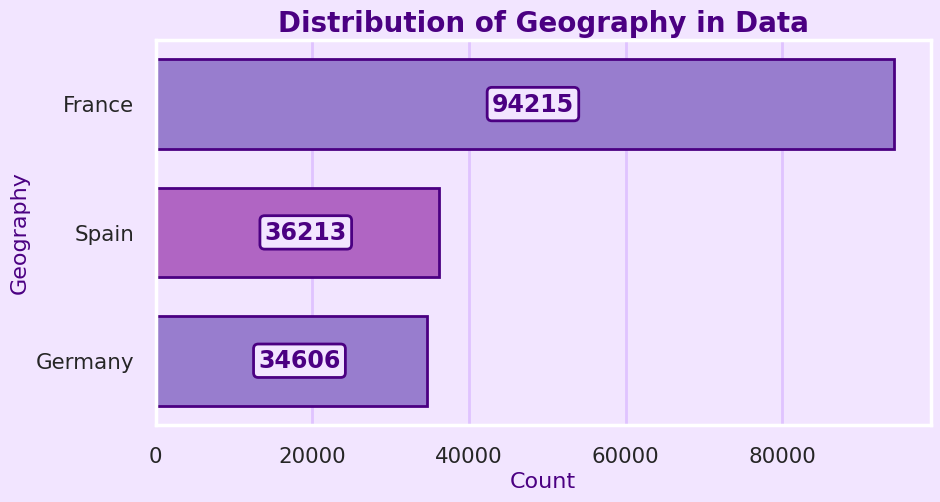

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="Geography")

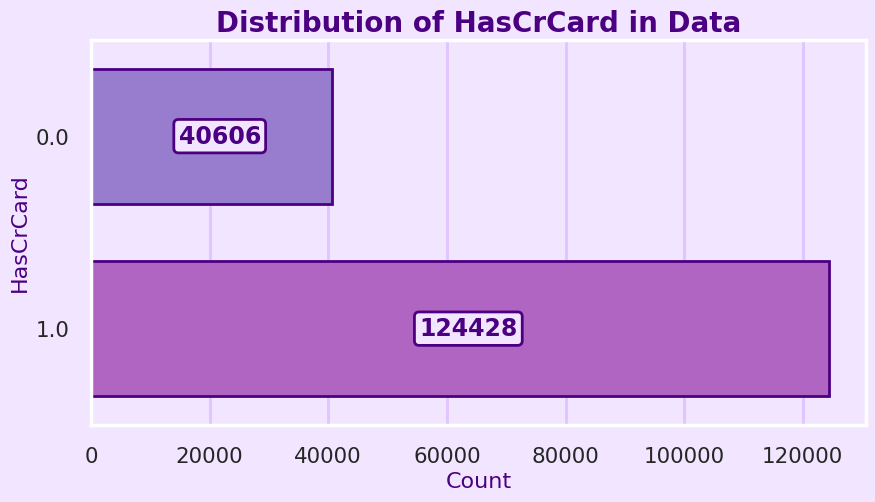

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="HasCrCard")

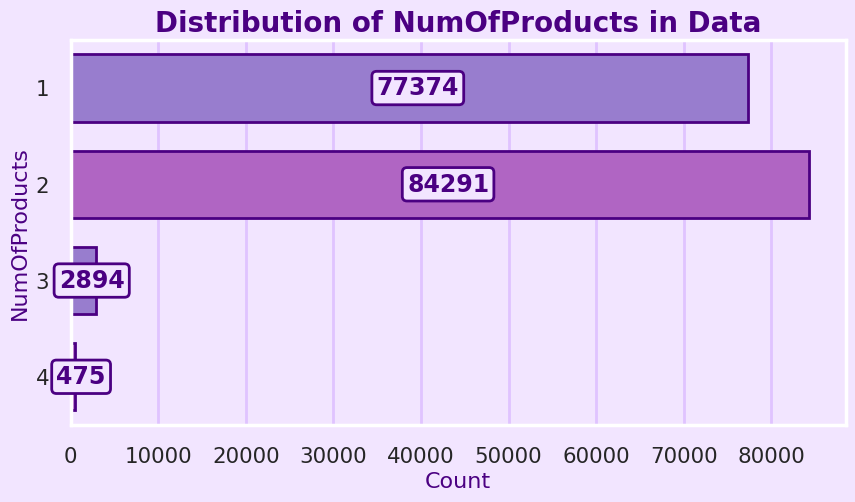

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="NumOfProducts")

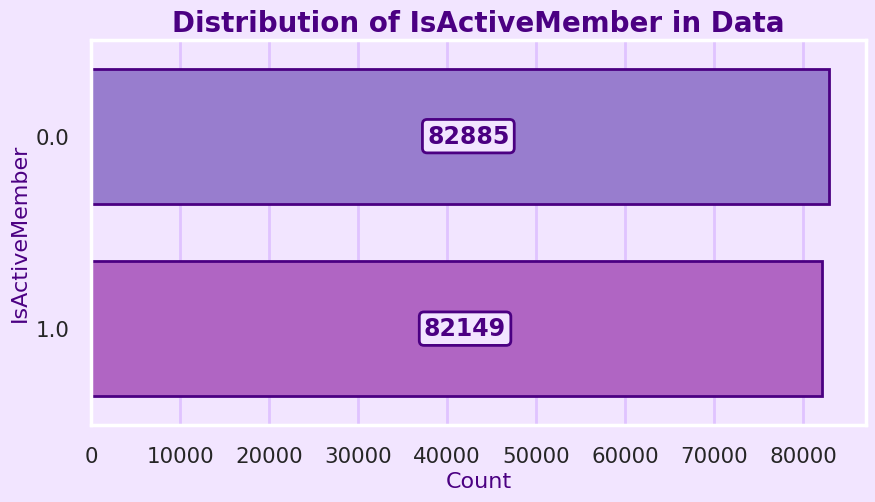

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="IsActiveMember")

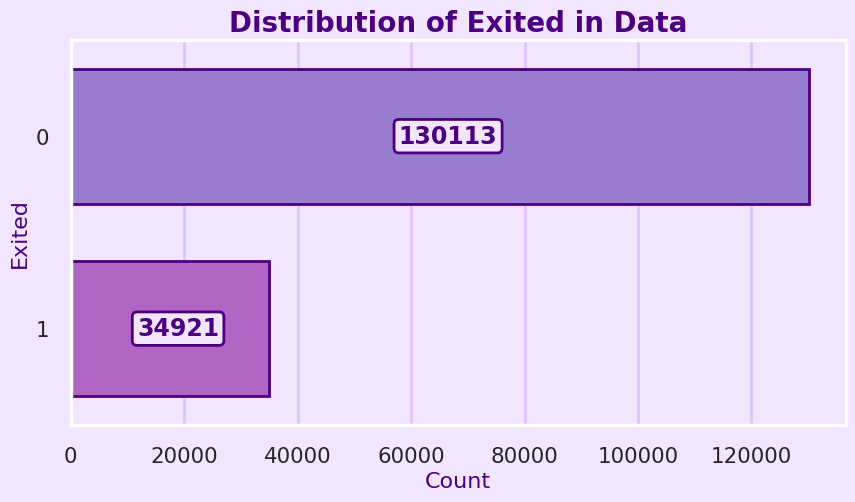

In [ ]:
Categorical_Features_Visulatisation(data=data, feature="Exited")

In [ ]:
def Numerical_Feature_Visualization(data,feature):

  # Define custom color for the histogram and kernel density estimate
  hist_color = "#8a2be2"  # Blue violet
  line_color = "#4b0082"  # Indigo
  mean_line_color = "#ff4500"  # Orange red
  median_line_color = "#1e90ff"  # Dodger blue

  # Create a figure with specified size
  fig = plt.figure(figsize=(10, 6))

  # Create a histogram with the violet theme colors
  histplot = sns.histplot(data=data, x=feature, bins=20, color=hist_color, edgecolor=line_color, kde=True)

  # Set the color for the kernel density line
  histplot.get_lines()[0].set_color(line_color)

  # Calculate mean and median
  mean_value = data[feature].mean()
  median_value = data[feature].median()

  # Add mean and median lines
  plt.axvline(mean_value, color=mean_line_color, linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color=median_line_color, linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

  # Set labels and title with appropriate colors
  plt.title(f"Distribution of {feature} with Mean and Median", color=line_color, fontsize=20, weight='bold')
  plt.xlabel(feature, color=line_color, fontsize=16)
  plt.ylabel("Count", color=line_color, fontsize=16)

  # Add legend
  plt.legend()

  # Show the plot
  plt.show()


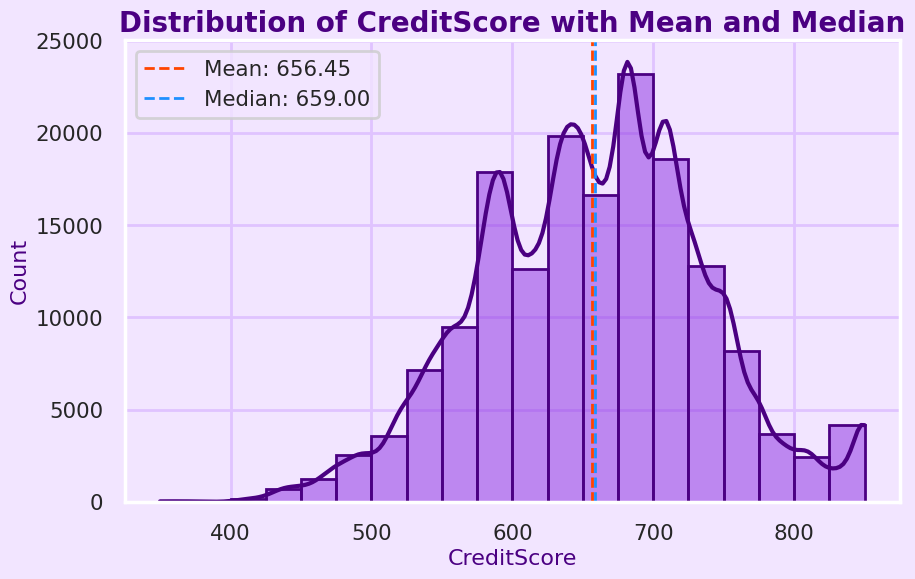

In [ ]:
Numerical_Feature_Visualization(data=data, feature='CreditScore')

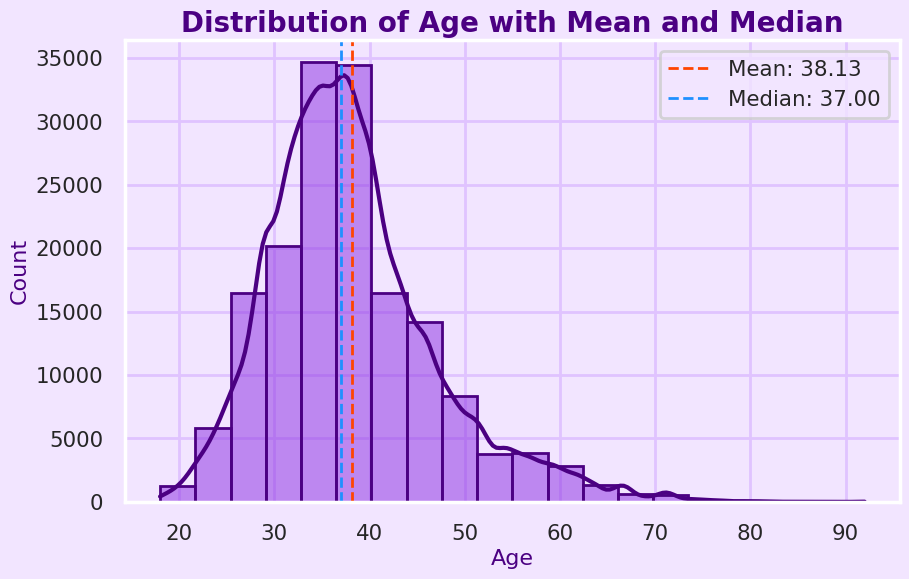

In [ ]:
Numerical_Feature_Visualization(data=data, feature='Age')

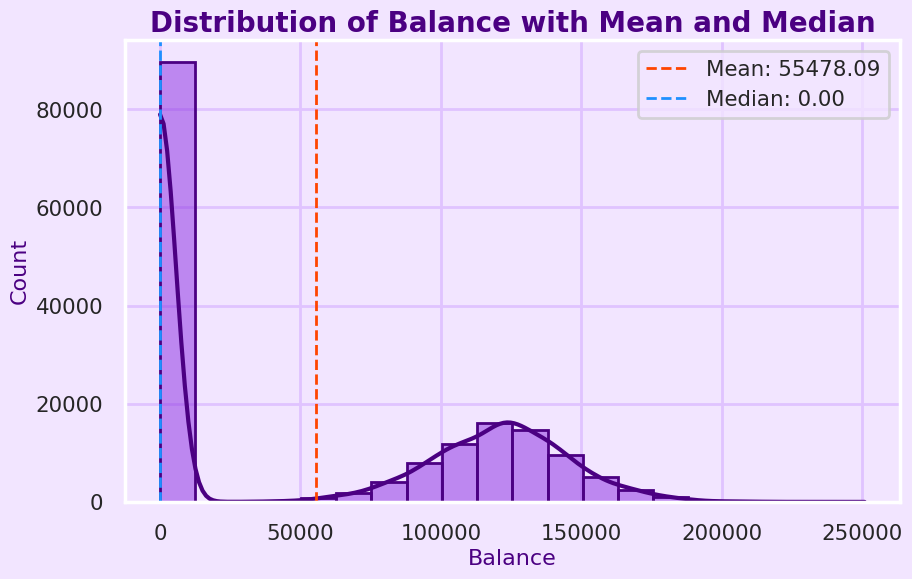

In [ ]:
Numerical_Feature_Visualization(data=data, feature='Balance')

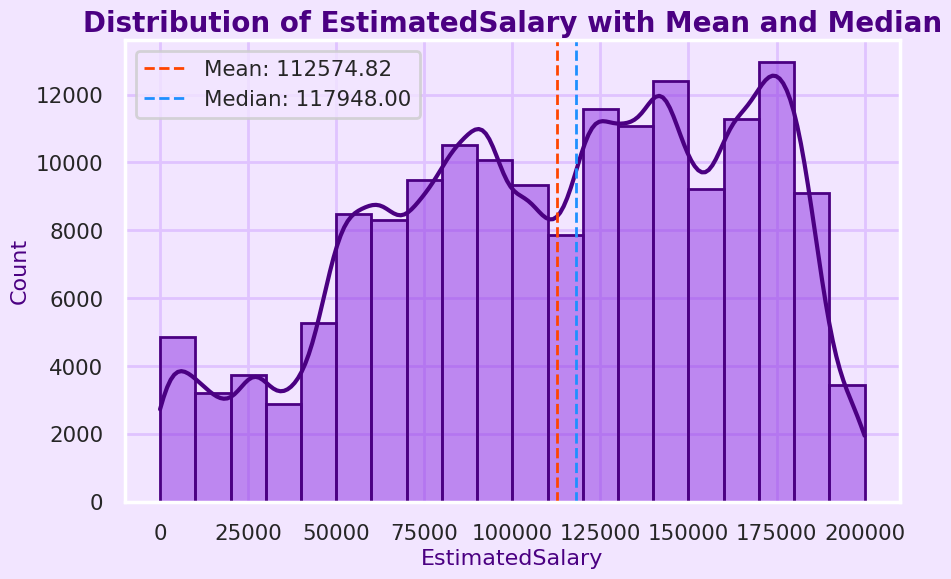

In [ ]:
Numerical_Feature_Visualization(data=data, feature='EstimatedSalary')

In [ ]:
def Categorical_Features_Distribution_Visualization(data, categorical_features, target_feature):
    num_features = len(categorical_features)

    # Calculate the number of rows needed
    num_rows = (num_features + 1) // 2

    # Create figure and axes for subplots with larger figure size
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 6*num_rows))

    # Flatten the axes array for easier indexing
    axs = axs.flatten()

    # Iterate over categorical features
    for i, feature in enumerate(categorical_features):
        # Plot for each categorical feature
        p = sns.countplot(ax=axs[i], y=feature, hue=target_feature, data=data,
                          palette=palette[1:3], edgecolor='#4b0082', linewidth=2)
        axs[i].set_title(f'Distribution of {feature} in Data', fontsize=16, weight='bold')
        axs[i].set_xlabel('Count', fontsize=14)
        axs[i].set_ylabel(feature, fontsize=14)

        # Add text on top of the bars
        for container in p.containers:
            p.bar_label(container, label_type="center", color='#4b0082', fontsize=17, weight='bold', padding=6,
                        bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#f2e5ff", "edgecolor": '#4b0082', "linewidth": 2, "alpha": 1})

    # Remove any unused subplots
    if num_features % 2 != 0:
        fig.delaxes(axs[-1])

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

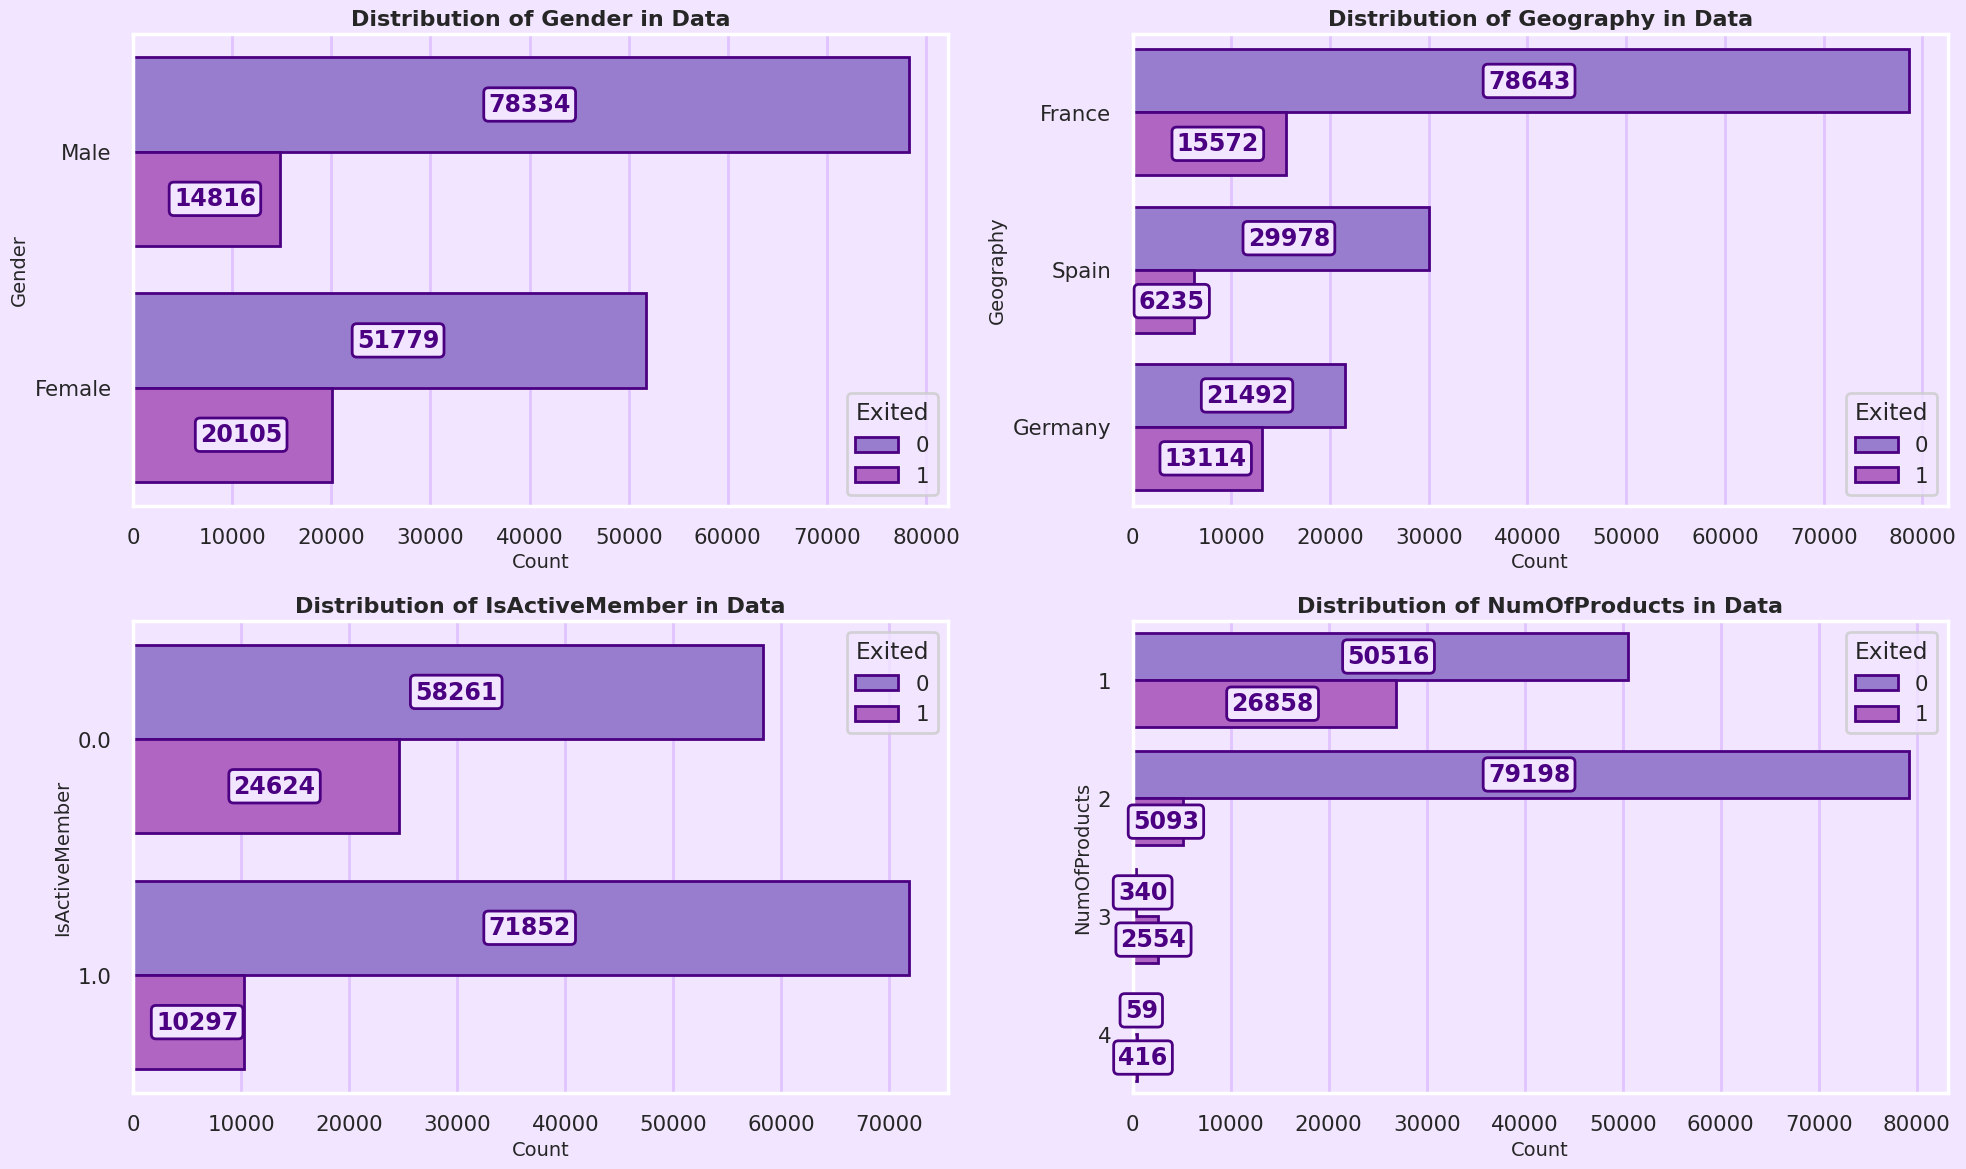

In [ ]:
# Replace 'data' with your actual DataFrame variable
Categorical_Features_Distribution_Visualization(data=data, categorical_features=['Gender','Geography', 'IsActiveMember', 'NumOfProducts'], target_feature='Exited')

In [ ]:
def Numerical_Features_Distribution_Visualization(data, numerical_features, target_feature):
    num_numerical = len(numerical_features)

    # Define custom colors for each class
    colors = ['#8a2be2','#ff6db0']

    # Create figure and axes for subplots with larger figure size
    fig, axs = plt.subplots(1, num_numerical, figsize=(6*num_numerical, 6))

    # Iterate over numerical features
    for j, num_feature in enumerate(numerical_features):
        # Iterate over each class in the target feature
        for i, class_value in enumerate(data[target_feature].unique()):
            # Create a histogram for each class
            sns.histplot(data=data[data[target_feature] == class_value], x=num_feature, bins=20, color=colors[i],
                         edgecolor='#4b0082', kde=True, label=f'{i}', ax=axs[j])

        # Set labels and title with appropriate colors
        axs[j].set_title(f"Distribution of {num_feature} by {target_feature} Classes", color='#4b0082', fontsize=16, weight='bold')
        axs[j].set_xlabel(num_feature, color='#4b0082', fontsize=14)
        axs[j].set_ylabel("Count", color='#4b0082', fontsize=14)

        # Add legend
        axs[j].legend()

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

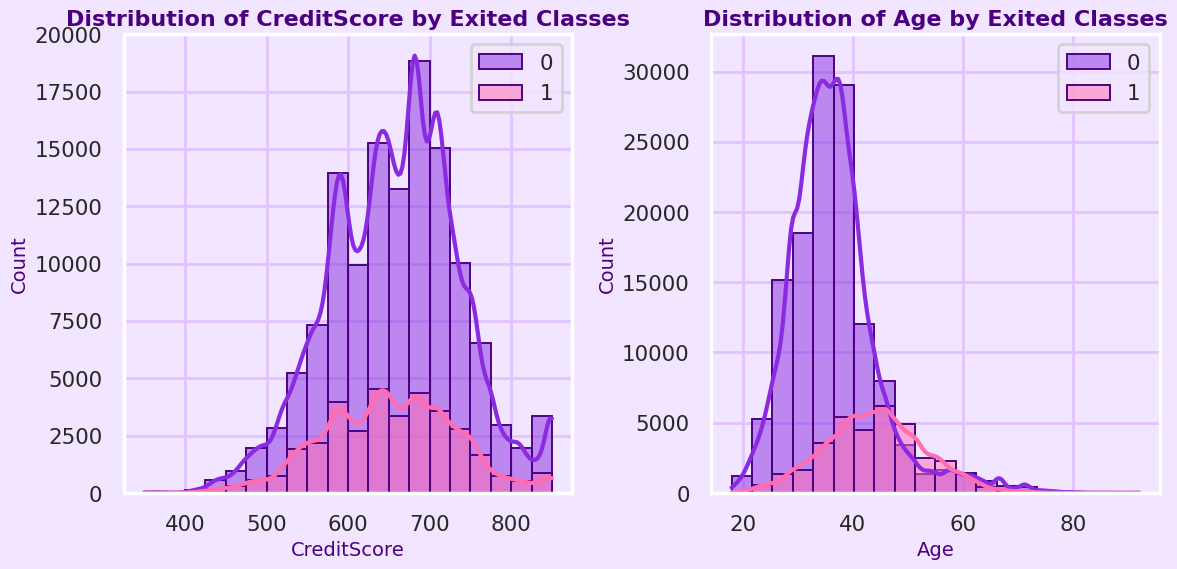

In [ ]:
# Replace 'data' with your actual DataFrame variable
Numerical_Features_Distribution_Visualization(data, numerical_features=['CreditScore','Age'], target_feature='Exited')

## Data Visualization

In this section, we visualized the distribution of our features to better understand the data.

Through various plots, we can observe the distributions, relationships, and potential outliers in the dataset.

This visual inspection provides valuable insights into the data's underlying patterns and characteristics.

## Data Skewness

Upon analyzing the visualizations, we observed that some features in our dataset are skewed.

Skewness in the data can impact the performance of our machine learning models.

To address this issue, we need to apply data augmentation techniques. These techniques will help us to create a more balanced dataset, ensuring that our model can learn effectively from all classes.

In the data splitting section, we will employ these data augmentation methods to correct the skewness and enhance the quality of our training data.


#5- Data Preprocessing

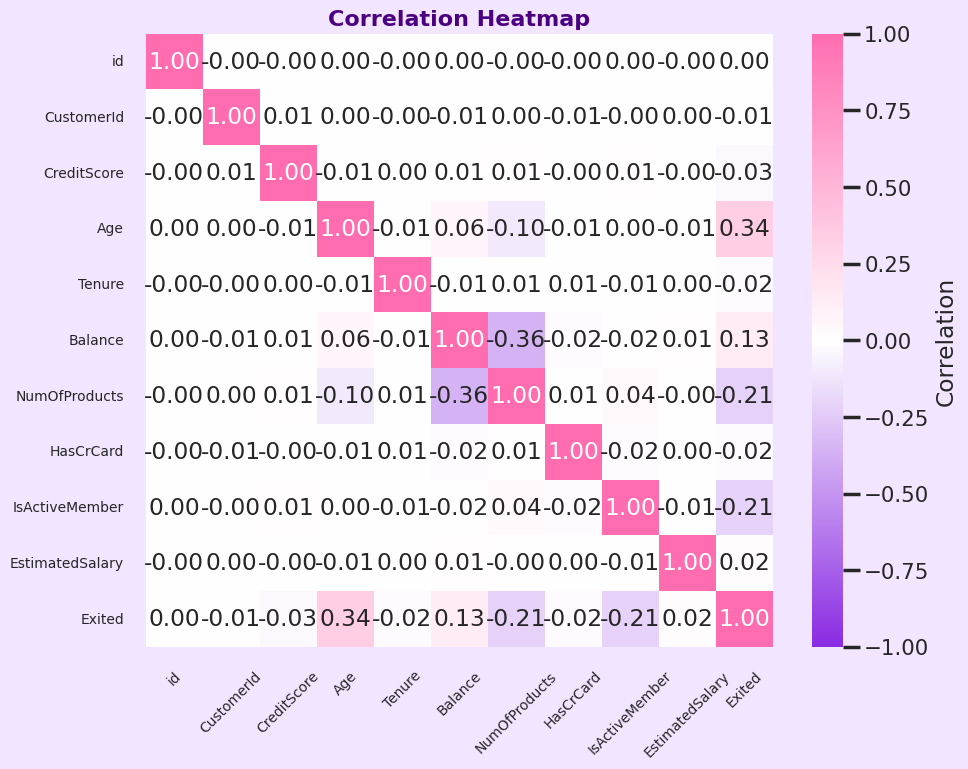

In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()

# Define custom colormap with colors for positive, negative, and neutral correlations
colors = ["#8a2be2", "#ffffff", "#ff6db0"]  # Positive to negative: violet to white to pink
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)

# Plot heatmap with custom styling
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f',
                      vmin=-1, vmax=1, center=0,
                      cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap', fontsize=16, weight='bold', color='#4b0082')  # Adjust title properties
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)   # Rotate y-axis labels if needed
plt.tick_params(axis='both', which='major', labelsize=10)  # Set smaller tick label size

# Show plot
plt.tight_layout()       # Adjust layout for better spacing
plt.show()


In [ ]:
# Calculate the Predictive Power Score (PPS) matrix for the dataset
pps_matrix = pps.matrix(data)

In [ ]:
pps_matrix_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

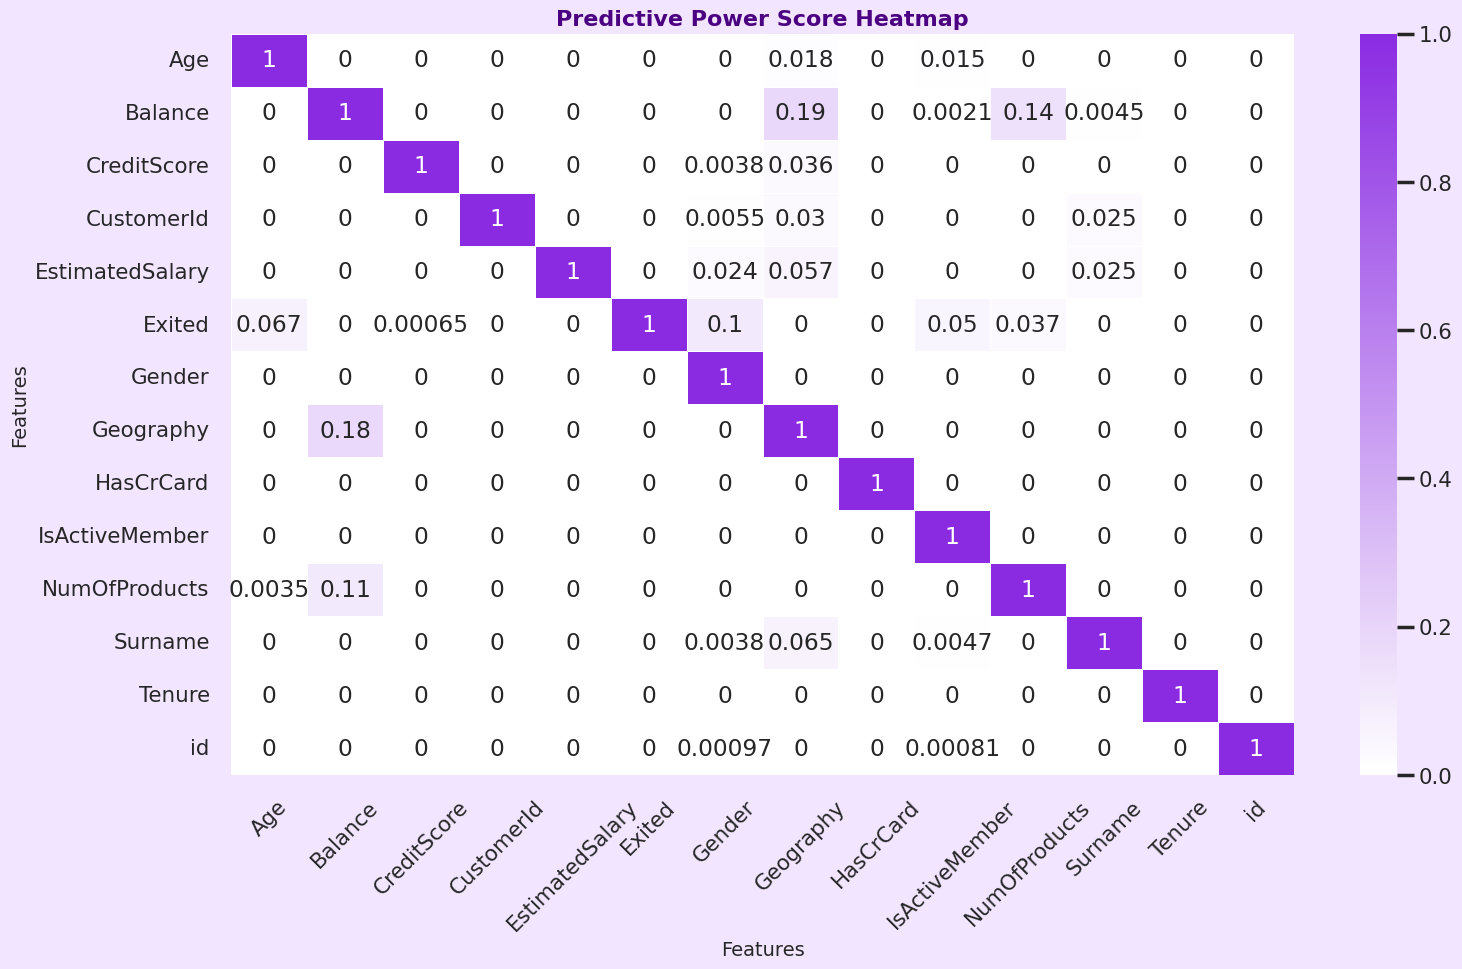

In [ ]:
# Assuming pps_matrix_pivot is your PPS matrix
plt.figure(figsize=(16, 10))

# Define custom colormap with violet to white gradient
colors = ["white","#8a2be2"]
cmap = LinearSegmentedColormap.from_list("Custom", colors)

# Plot heatmap with custom styling
sns.heatmap(pps_matrix_pivot, vmin=0, vmax=1, cmap=cmap, linewidths=0.5, annot=True)
plt.title('Predictive Power Score Heatmap', fontsize=16, weight='bold', color='#4b0082')  # Customize title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)   # Rotate y-axis labels if needed
plt.tight_layout()       # Adjust layout for better spacing

# Show plot
plt.show()


## Data Preprocessing

In this section, we preprocessed the data to prepare it for modeling.

During our analysis, we found that the features 'Age', 'Credit Score', 'Is Active Member', and 'Number of Products' had high correlation and predictive power scores (PPS). These features play a significant role in predicting customer churn.

Given their importance, we will focus on creating new features derived from these key attributes.

By engineering additional features, we aim to capture more nuanced patterns in the data, which can improve the performance of our predictive models.

This step is crucial in enhancing the model's ability to accurately identify potential churners.


#6- Feature Engineering

In [ ]:
# Binning 'Age' into categorical bins and encoding
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['Young', 'Teenager', 'Adult', 'Middle_aged', 'older', 'oldest'])
data['AgeBin'] = data['AgeBin'].cat.codes

# Creating a binary feature for seniors (age >= 50)
data['IsSenior'] = data['Age'].apply(lambda x: 1 if x >= 50 else 0)

# Calculating products per tenure ratio
data['Products_Per_Tenure'] = data['Tenure'] / data['NumOfProducts']

# Calculating balance to estimated salary ratio
data['Balance_EstimatedSalary_Ratio'] = data['Balance'] / data['EstimatedSalary']

# Binning 'CreditScore' into categorical tiers and encoding
data['CreditScoreTier'] = pd.cut(data['CreditScore'], bins=[0, 550, 750, 850], labels=['Low', 'Medium', 'High'])
data['CreditScoreTier'] = data['CreditScoreTier'].cat.codes

# Creating an interaction feature between 'HasCrCard' and 'IsActiveMember'
data['IsActive_by_CreditCard'] = data['HasCrCard'] * data['IsActiveMember']

In [ ]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBin,IsSenior,Products_Per_Tenure,Balance_EstimatedSalary_Ratio,CreditScoreTier,IsActive_by_CreditCard
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,2,0,1.5,0.000000,1,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,2,0,0.5,0.000000,1,1.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,2,0,5.0,0.000000,1,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,2,0,2.0,1.760655,1,1.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,0,2.5,0.000000,1,1.0


In [ ]:
data = data.drop(columns=['id', 'CustomerId', 'Surname'])

In [ ]:
data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)

In [ ]:
data = pd.get_dummies(data, columns=['Geography'])

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBin,IsSenior,Products_Per_Tenure,Balance_EstimatedSalary_Ratio,CreditScoreTier,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,2,0,1.5,0.000000,1,0.0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,2,0,0.5,0.000000,1,1.0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,2,0,5.0,0.000000,1,0.0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,2,0,2.0,1.760655,1,1.0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,0,2.5,0.000000,1,1.0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CreditScore                    165034 non-null  int64  
 1   Gender                         165034 non-null  uint8  
 2   Age                            165034 non-null  float64
 3   Tenure                         165034 non-null  int64  
 4   Balance                        165034 non-null  float64
 5   NumOfProducts                  165034 non-null  int64  
 6   HasCrCard                      165034 non-null  float64
 7   IsActiveMember                 165034 non-null  float64
 8   EstimatedSalary                165034 non-null  float64
 9   Exited                         165034 non-null  int64  
 10  AgeBin                         165034 non-null  int8   
 11  IsSenior                       165034 non-null  int64  
 12  Products_Per_Tenure           

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBin,IsSenior,Products_Per_Tenure,Balance_EstimatedSalary_Ratio,CreditScoreTier,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,1.5,0.000000,1,0.0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0.5,0.000000,0,1.0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,5.0,0.000000,1,0.0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,2.0,1.760655,0,1.0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,0,2.5,0.000000,1,1.0,0,0,1


In [ ]:
scaled_features=['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Balance_EstimatedSalary_Ratio']

In [ ]:
# Example usage assuming `data` is your DataFrame containing these features

# Initialize scalers
scalers = {
    'CreditScore': StandardScaler(),
    'Age': MinMaxScaler(),
    'Balance': RobustScaler(),
    'EstimatedSalary': MinMaxScaler(),
    'Balance_EstimatedSalary_Ratio': MinMaxScaler()
}

# Fit and transform each feature
for feature in scaled_features:
    data[feature] = scalers[feature].fit_transform(data[[feature]])

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBin,IsSenior,Products_Per_Tenure,Balance_EstimatedSalary_Ratio,CreditScoreTier,IsActive_by_CreditCard,Geography_France,Geography_Germany,Geography_Spain
0,0.144135,1,0.202703,3,0.000000,2,1.0,0.0,0.907279,0,2,0,1.5,0.000000,1,0.0,1,0,0
1,-0.367706,1,0.202703,1,0.000000,2,1.0,1.0,0.247483,0,2,0,0.5,0.000000,1,1.0,1,0,0
2,0.268974,1,0.297297,10,0.000000,2,1.0,0.0,0.924364,0,2,0,5.0,0.000000,1,0.0,1,0,0
3,-0.941966,1,0.216216,2,1.241313,1,1.0,1.0,0.422787,0,2,0,2.0,0.000137,1,1.0,1,0,0
4,0.743362,1,0.202703,5,0.000000,2,1.0,1.0,0.075293,0,2,0,2.5,0.000000,1,1.0,0,0,1


#7- Data Splitting

In [ ]:
# Selecting all columns except 'Exited' as features
X = data.drop(columns=['Exited'])  # Feature matrix

# Selecting 'Exited' as the target variable
y = data['Exited']  # Target vector

In [ ]:
# Split data into training and test sets
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Split data into training and test sets
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size=0.2, random_state=42, stratify=y_)

In [ ]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(105621, 18)
(26406, 18)
(33007, 18)


In [ ]:
def Target_Visulatisation(data, feature):
    fig = plt.figure(figsize=(10, 5))

    # Create a count plot with the new palette
    p = sns.countplot(y=data, palette=palette[1:3], edgecolor='#4b0082', linewidth=2, width=0.7)

    # Add text on top of the bars
    for container in p.containers:
        p.bar_label(container, label_type="center", color='#4b0082', fontsize=17, weight='bold', padding=6,
                    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#f2e5ff", "edgecolor": '#4b0082', "linewidth": 2, "alpha": 1})

    # Set the title and labels with appropriate colors and styles
    plt.title(f"Distribution of {feature} in Data", color="#4b0082", fontsize=20, weight='bold')
    plt.xlabel("Count", color="#4b0082", fontsize=16)
    plt.ylabel(feature, color="#4b0082", fontsize=16)

    # Show the plot
    plt.show()


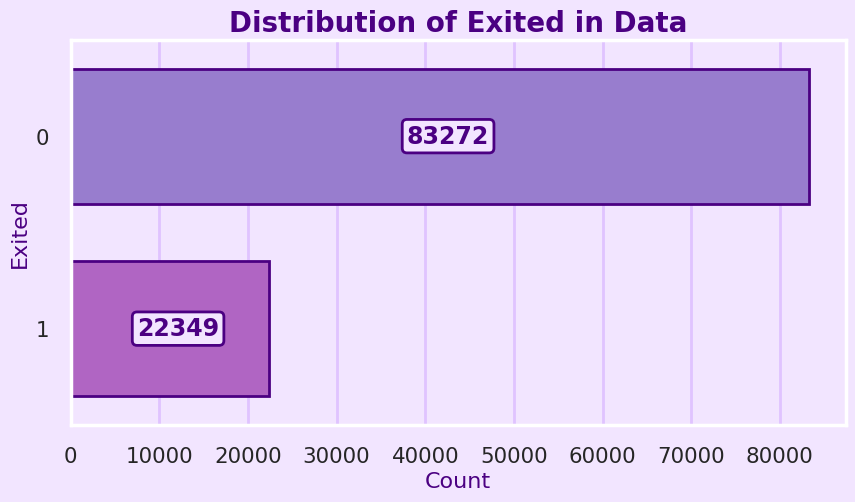

In [ ]:
Target_Visulatisation(data=y_train,feature='Exited')

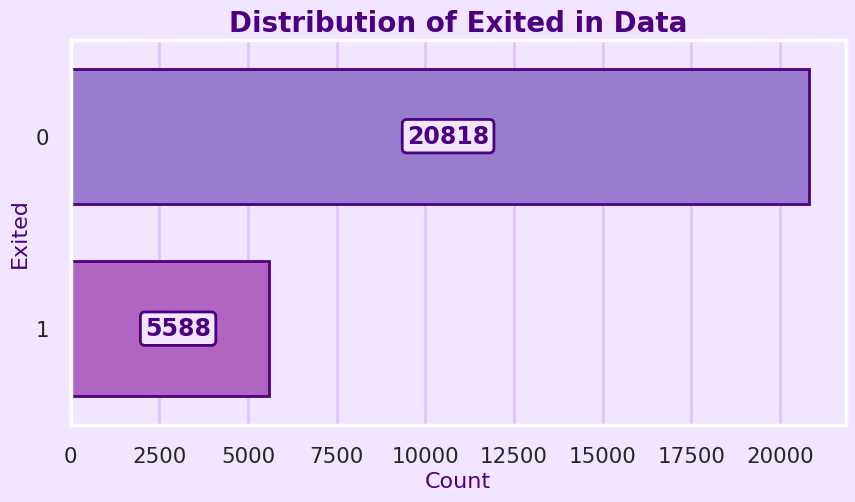

In [ ]:
Target_Visulatisation(data=y_cv,feature='Exited')

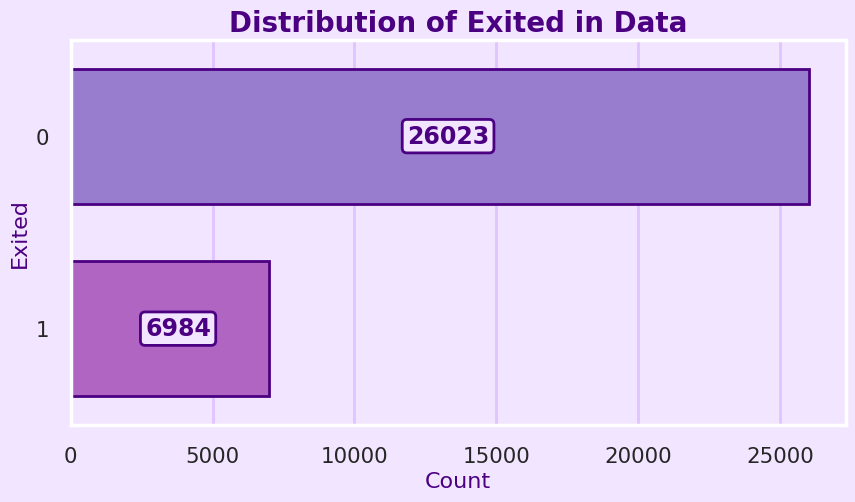

In [ ]:
Target_Visulatisation(data=y_test,feature='Exited')

In [ ]:
# Apply SMOTE only on the training data to fix skewed data problem
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(124908, 18)

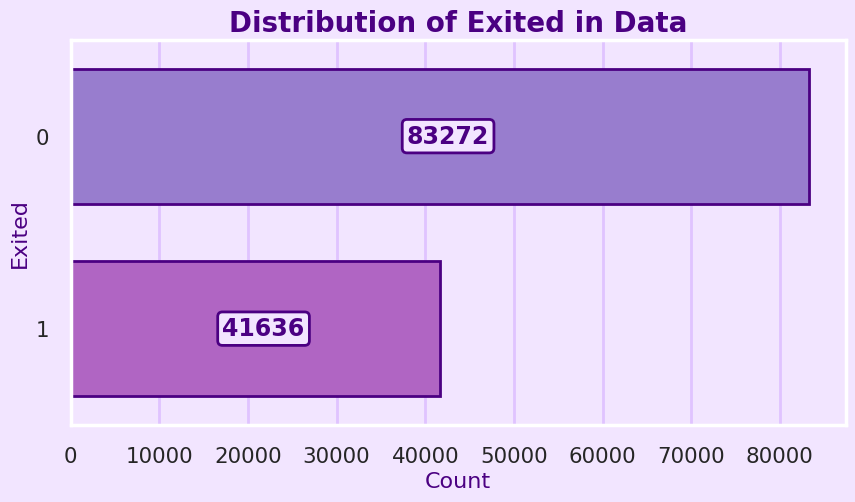

In [ ]:
Target_Visulatisation(data=y_train,feature='Exited')

## Data Splitting and Augmentation

To ensure that our model generalizes well to unseen data, we need to handle the imbalance in our dataset.

The target variable is skewed, with fewer instances of customers who have churned compared to those who haven't. To address this, we employ the SMOTE (Synthetic Minority Over-sampling Technique) method.

SMOTE is applied only on the training data to prevent data leakage. Applying SMOTE before splitting the data would introduce information from the test set into the training set, leading to overly optimistic performance estimates. By focusing on the training set, we ensure that our model learns from synthetic samples derived solely from the training data, preserving the integrity of the evaluation process.

Additionally, we use a sampling strategy of 0.5 with SMOTE to maintain a balanced dataset without creating an excessive number of synthetic samples. This approach helps prevent overfitting and ensures the model remains robust when applied to real-world data.


#8- Building Base Model

In [ ]:
model=Sequential([
    Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=BinaryCrossentropy(),
    )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9728      
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [ ]:
model.fit(X_train, y_train, epochs=20, verbose=1,  callbacks=[early_stopping])

Epoch 1/20
3904/3904 [==============================] - 14s 3ms/step - loss: 0.4439
Epoch 2/20
3904/3904 [==============================] - 18s 5ms/step - loss: 0.4164
Epoch 3/20
3904/3904 [==============================] - 12s 3ms/step - loss: 0.4125
Epoch 4/20
3904/3904 [==============================] - 14s 4ms/step - loss: 0.4099
Epoch 5/20
3904/3904 [==============================] - 14s 4ms/step - loss: 0.4058
Epoch 6/20
3904/3904 [==============================] - 11s 3ms/step - loss: 0.4051
Epoch 7/20
3904/3904 [==============================] - 12s 3ms/step - loss: 0.4044
Epoch 8/20
3904/3904 [==============================] - 16s 4ms/step - loss: 0.4027
Epoch 9/20
3904/3904 [==============================] - 14s 4ms/step - loss: 0.4034
Epoch 10/20
3904/3904 [==============================] - 12s 3ms/step - loss: 0.4026
Epoch 11/20
3904/3904 [==============================] - 17s 4ms/step - loss: 0.4014
Epoch 12/20
3904/3904 [==============================] - 11s 3ms/step - lo

In [ ]:
y_pred_probs = model.predict(X_test)  # Predicted probabilities

1032/1032 [==============================] - 1s 1ms/step


In [ ]:
y_pred = (y_pred_probs > 0.5).astype("int64")

In [ ]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

In [ ]:
print("\nBase Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Base Model Results:
Accuracy: 0.8557
Precision: 0.6589
Recall: 0.6598
F1 Score: 0.6593


In [ ]:
def plot_confusion_matrix(cm):
    # Define custom colormap
    colors = ["white", "#ba55d3"]
    cmap = LinearSegmentedColormap.from_list("Custom", colors)

    # Plotting the confusion matrix with borders
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=1, linecolor='#4b0082')

    # Customize labels and title
    plt.xlabel('Predicted Labels', fontsize=14, color='#4b0082')
    plt.ylabel('True Labels', fontsize=14, color='#4b0082')
    plt.title('Confusion Matrix', fontsize=16, weight='bold', color='#4b0082')

    # Show plot
    plt.show()


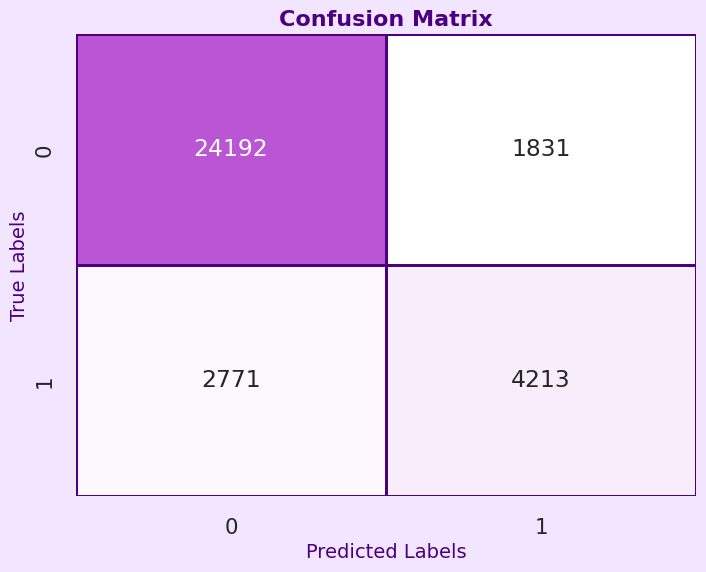

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm)

## Base Neural Network Model

The base neural network model was designed as a starting point for our experiments. It consisted of several dense (fully connected) layers with ReLU activation functions, which are commonly used for their efficiency and effectiveness in handling non-linearities.

The model included an input layer corresponding to the number of features in our dataset, followed by a series of hidden layers, and an output layer with a sigmoid activation function to produce the probability of a customer churning.

This initial model served as a foundation upon which we could build and improve through extensive hyperparameter tuning and feature engineering.


#9- Tuning Neural Network Model

In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    units = hp.Int('units_input', min_value=128, max_value=512, step=32)
    model.add(Dense(units=units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate_input', min_value=0.0, max_value=0.3, step=0.1)))

    # Hidden layers with decreasing units
    for i in range(3):
        previous_units = units
        units = hp.Int(f'units_{i+1}', min_value=previous_units//2, max_value=units, step=32)
        model.add(Dense(units=units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_rate_{i+1}', min_value=0.0, max_value=0.3, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate',
                     min_value=1e-4,
                     max_value=1e-2,
                     sampling='LOG',
                     default=1e-3)),
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='model_tuning',
    project_name='bank_churn'
)

tuner.search_space_summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Perform hyperparameter search with early stopping
tuner.search(X_train, y_train, epochs=20, validation_data=(X_cv, y_cv), callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [00h 08m 26s]
val_accuracy: 0.8588199615478516

Best val_accuracy So Far: 0.8611300587654114
Total elapsed time: 01h 41m 44s


In [ ]:
print(f"""
The hyperparameter search is complete.
The optimal number of units in the densely-connected layer is {best_hps.get('units_input'), best_hps.get('units_1'), best_hps.get('units_2'), best_hps.get('units_3')}.
The optimal dropout rates are {best_hps.get('dropout_rate_input')}, {best_hps.get('dropout_rate_1')}, {best_hps.get('dropout_rate_2')}, and {best_hps.get('dropout_rate_3')}.
The optimal Learning rate is {best_hps.get('learning_rate')}
""")


The hyperparameter search is complete.
The optimal number of units in the densely-connected layer is (512, 96, 64, 16).
The optimal dropout rates are 0.1, 0.0, 0.0, and 0.2.
The optimal Learning rate is 0.0015916565411355722



In [ ]:
# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
3904/3904 [==============================] - 26s 6ms/step - loss: 0.4350 - accuracy: 0.8043
Epoch 2/20
3904/3904 [==============================] - 22s 6ms/step - loss: 0.4134 - accuracy: 0.8162
Epoch 3/20
3904/3904 [==============================] - 22s 6ms/step - loss: 0.4094 - accuracy: 0.8180
Epoch 4/20
3904/3904 [==============================] - 22s 6ms/step - loss: 0.4061 - accuracy: 0.8199
Epoch 5/20
3904/3904 [==============================] - 22s 6ms/step - loss: 0.4042 - accuracy: 0.8206
Epoch 6/20
3904/3904 [==============================] - 23s 6ms/step - loss: 0.4024 - accuracy: 0.8223
Epoch 7/20
3904/3904 [==============================] - 23s 6ms/step - loss: 0.4018 - accuracy: 0.8224
Epoch 8/20
3904/3904 [==============================] - 24s 6ms/step - loss: 0.3999 - accuracy: 0.8234
Epoch 9/20
3904/3904 [==============================] - 22s 6ms/step - loss: 0.3992 - accuracy: 0.8228
Epoch 10/20
3904/3904 [==============================] - 24s 6ms/step - l

### Model Tuning

For the neural network model, we focused on hyperparameter tuning to achieve optimal performance. The key hyperparameters we adjusted included the number of neurons in each layer, learning rate, and dropout rate.

We employed a systematic approach to tuning these parameters using techniques such as random search. By experimenting with different combinations of hyperparameters, we aimed to identify the configuration that provided the best performance in terms of accuracy, precision, recall, and F1 score.

Specifically, we explored:
- **Number of Neurons:** Adjusting the depth and width of the neural network to find the optimal structure for capturing complex patterns in the data.
- **Learning Rate:** Fine-tuning the learning rate to ensure efficient convergence during training.
- **Dropout Rate:** Introducing dropout layers to prevent overfitting and improve the model's generalization capabilities.

Through this comprehensive tuning process, we were able to significantly improve the performance of our neural network model, ensuring it is well-suited for predicting customer churn in the banking sector.


#10- Results

In [ ]:
y_pred_probs = best_model.predict(X_test)  # Predicted probabilities
# Define thresholds to test
thresholds = [i / 100.0 for i in range(0, 101, 5)]

# Initialize a dictionary to store the results
results = {
    "Threshold": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Evaluate the model for each threshold
for threshold in thresholds:
    # Convert probabilities to class labels based on the current threshold
    y_pred = (y_pred_probs > threshold).astype("int64")

    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Store the results
    results["Threshold"].append(threshold)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

# Print the results
print("\nTuned Model Evaluation:")
for i in range(len(thresholds)):
    print(f"Threshold: {results['Threshold'][i]:.2f} - Accuracy: {results['Accuracy'][i]:.4f}, "
          f"Precision: {results['Precision'][i]:.4f}, Recall: {results['Recall'][i]:.4f}, "
          f"F1 Score: {results['F1 Score'][i]:.4f}")

1032/1032 [==============================] - 4s 4ms/step

XGBoost Classifier Evaluation:
Threshold: 0.00 - Accuracy: 0.2116, Precision: 0.2116, Recall: 1.0000, F1 Score: 0.3493
Threshold: 0.05 - Accuracy: 0.5274, Precision: 0.3052, Recall: 0.9664, F1 Score: 0.4639
Threshold: 0.10 - Accuracy: 0.6605, Precision: 0.3771, Recall: 0.9274, F1 Score: 0.5362
Threshold: 0.15 - Accuracy: 0.7263, Precision: 0.4285, Recall: 0.8792, F1 Score: 0.5762
Threshold: 0.20 - Accuracy: 0.7784, Precision: 0.4862, Recall: 0.8315, F1 Score: 0.6136
Threshold: 0.25 - Accuracy: 0.8142, Precision: 0.5425, Recall: 0.7792, F1 Score: 0.6396
Threshold: 0.30 - Accuracy: 0.8326, Precision: 0.5826, Recall: 0.7371, F1 Score: 0.6508
Threshold: 0.35 - Accuracy: 0.8445, Precision: 0.6161, Recall: 0.7036, F1 Score: 0.6570
Threshold: 0.40 - Accuracy: 0.8525, Precision: 0.6460, Recall: 0.6698, F1 Score: 0.6577
Threshold: 0.45 - Accuracy: 0.8572, Precision: 0.6720, Recall: 0.6347, F1 Score: 0.6528
Threshold: 0.50 - Accuracy: 0.8

In [ ]:
y_pred = (y_pred_probs > 0.5).astype("int64")

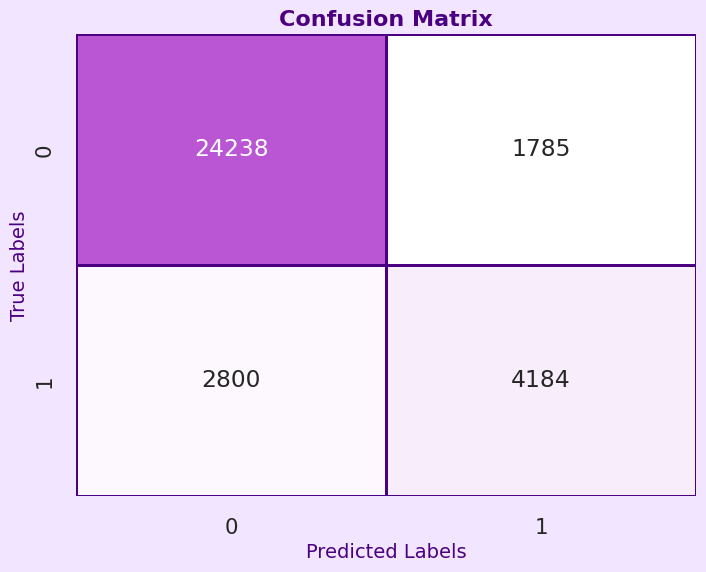

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm)

### Conclusion

In conclusion, after extensive data preprocessing, feature engineering, and model tuning, we achieved our best results with an accuracy of 86.1% and an F1 score of 0.64.

These metrics indicate that our model performs well in distinguishing between customers who are likely to churn and those who are not.

It is important to note that the F1 score can be adjusted based on the threshold we set for classification, allowing for a balance between precision and recall depending on the specific requirements of the business.

This flexibility is crucial for making informed decisions and optimizing strategies to reduce customer churn.
